In [49]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras.activations import sigmoid

In [3]:
database = pd.read_csv('default_of_credit_card_clientss.csv', sep = ";")
database.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#matrix formating
preview = database.iloc[:,1:24].values
classe = database.iloc[:,24].values

#Naive Bayes Model

In [7]:
#division training and test
X_trainNB, X_testeNB, y_trainNB, y_testeNB = train_test_split(preview, classe, test_size = 0.3, random_state = 0)

In [9]:
# Creating and training model 
naive_bayes = GaussianNB()
naive_bayes.fit(X_trainNB, y_trainNB)

GaussianNB()

In [10]:
#previsoes utilizando registro de teste
previsions = naive_bayes.predict(X_testeNB)
previsions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [12]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_testeNB, previsions)
confusao

array([[1431, 5629],
       [ 189, 1751]], dtype=int64)

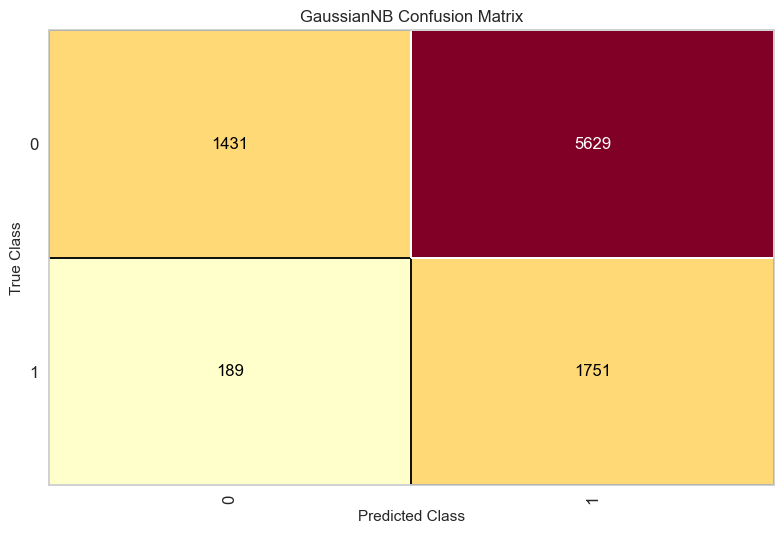

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_trainNB, y_trainNB)
v.score(X_testeNB, y_testeNB)
v.poof()

In [16]:
acurracyNB = accuracy_score(y_testeNB,previsions)
acurracyNB

0.35355555555555557

Decision Tree


In [20]:
#division training and test
X_trainDT, X_testeDT, y_trainDT, y_testeDT = train_test_split(preview, classe, test_size = 0.3, random_state = 0)

In [21]:
# Criação e treinamento do modelo
tree = DecisionTreeClassifier()
tree.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier()

In [22]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(tree, out_file = 'tree.dot')

In [23]:
# Obtenção das previsões
previewDT = tree.predict(X_testeDT)

In [24]:
#matriz de confusão
confusao = confusion_matrix(y_testeDT, previewDT)
confusao

array([[5778, 1282],
       [1122,  818]], dtype=int64)

In [25]:
#taxa acerto
acurracyDT = accuracy_score(y_testeDT, previewDT)
acurracyDT

0.7328888888888889

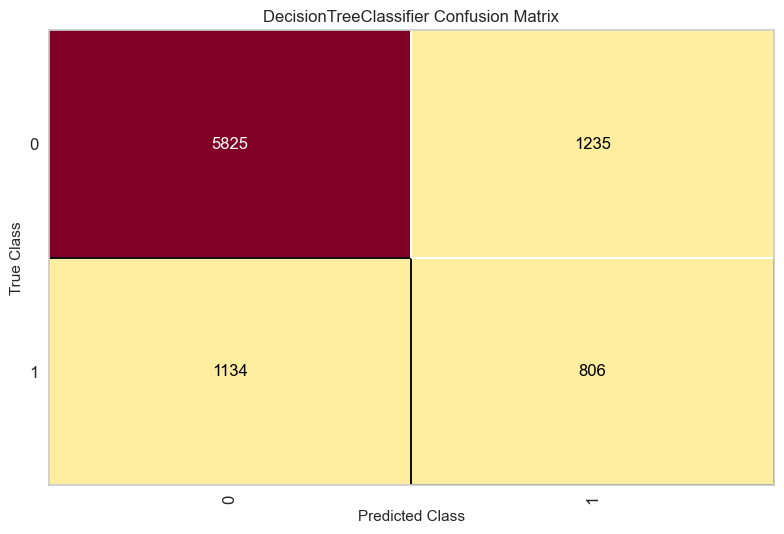

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
vi = ConfusionMatrix(DecisionTreeClassifier())
vi.fit(X_trainDT, y_trainDT)
vi.score(X_testeDT, y_testeDT)
vi.poof()

Random Forest


In [28]:
#division training and test
X_trainRF, X_testeRF, y_trainRF, y_testeRF = train_test_split(preview, classe, test_size = 0.3, random_state = 0)

In [29]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
forest = RandomForestClassifier(n_estimators = 1000)
forest.fit(X_trainRF, y_trainRF)

RandomForestClassifier(n_estimators=1000)

In [30]:
# Obtenção das previsões
previewRF = forest.predict(X_testeRF)

In [31]:
#matriz de confusão
confusaoRF = confusion_matrix(y_testeRF, previewRF)
confusaoRF

array([[6666,  394],
       [1239,  701]], dtype=int64)

In [32]:
#taxa acerto
acurracyRF = accuracy_score(y_testeRF, previewRF)
acurracyRF

0.8185555555555556

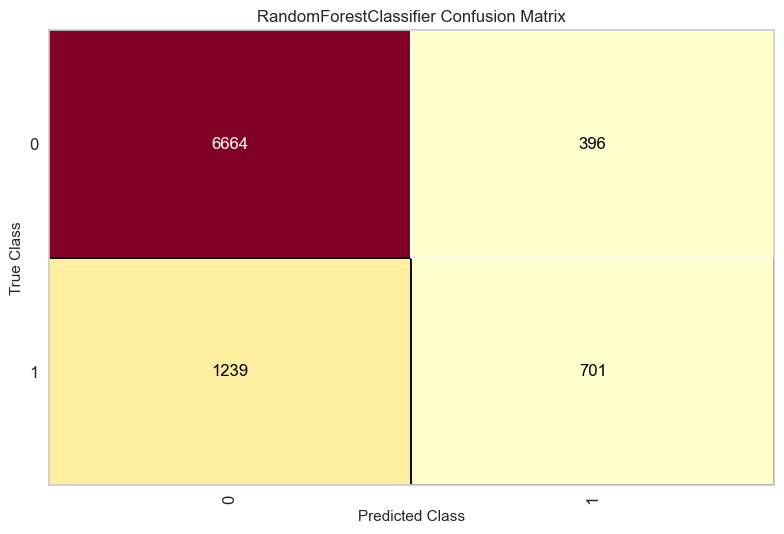

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
vii = ConfusionMatrix(RandomForestClassifier())
vii.fit(X_trainRF, y_trainRF)
vii.score(X_testeRF, y_testeRF)
vii.poof()